In [2]:
import pandas as pd

In [10]:
df_sampling = pd.read_csv("data/4123_IST_sampling.csv")
df_sampling.columns = df_sampling.columns.str.replace(' ', '')
df_sampling.head()

,participant_id,session,trial_no,global_time_onset_trial,ready_screen_on,ready_screen_duration,category_of_pics,probability,reward_type,majority_cat,...,sample_no,picture_path,pic_name,choose_sample_time,global_choose_sample,picture_on_global,picture_on_trial,picture_off_global,picture_off_trial,
0,4123,1,1,6.175991,6.176686,3.057400,ioc,0.6,5,indoor,...,1,C:/Users/EYETRACKER/Documents/info_sample_tas...,outdoor_82.jpg,1.058262,10.303376,10.332037,4.155356,12.341411,6.164731,
1,4123,1,1,6.175991,6.176686,3.057400,ioc,0.6,5,indoor,...,2,C:/Users/EYETRACKER/Documents/info_sample_tas...,outdoor_133.jpg,0.977646,13.567511,13.593086,7.416406,15.608749,9.432069,
2,4123,1,1,6.175991,6.176686,3.057400,ioc,0.6,5,indoor,...,3,C:/Users/EYETRACKER/Documents/info_sample_tas...,indoor_122.jpg,0.909801,16.767339,16.787396,10.610716,18.796897,12.620216,
3,4123,1,1,6.175991,6.176686,3.057400,ioc,0.6,5,indoor,...,4,C:/Users/EYETRACKER/Documents/info_sample_tas...,outdoor_114.jpg,0.777908,19.823399,19.844268,13.667587,21.853322,15.676641,
4,4123,1,2,26.578054,26.578616,3.051034,lnc,0.6,1,nonliving,...,1,C:/Users/EYETRACKER/Documents/info_sample_tas...,living_152.jpg,0.841852,30.479303,30.497736,3.919125,32.506476,5.927865,


In [11]:
groups_by_trial = df_sampling.groupby(by="trial_no")

In [20]:
def is_correct(group):
    first_row = group.iloc[0]
    return first_row.final_choice == first_row.majority_cat

In [69]:
def coor(group):
    num_outs = len(group[(group['pic_name'].str.startswith(" out")) | (group['pic_name'].str.startswith(" living"))])
    num_ins = len(group[(group['pic_name'].str.startswith(" in")) | (group['pic_name'].str.startswith(" non")) ])
    return (num_outs, len(group) - num_outs)

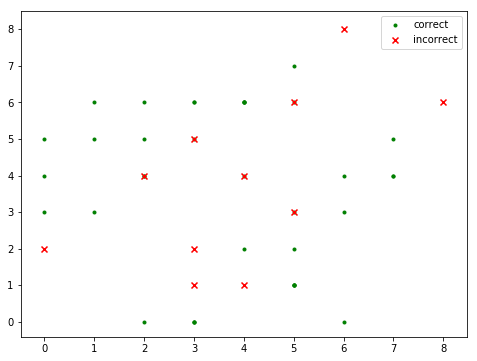

In [72]:
import matplotlib.pyplot as plt

correct_trials_coor = []
incorrect_trials_coor = []

for key, group in groups_by_trial:
    if is_correct(group):
        correct_trials_coor.append(coor(group))
    else:
        incorrect_trials_coor.append(coor(group))

fig = plt.figure()
plt.scatter([i[0] for i in correct_trials_coor], [i[1] for i in correct_trials_coor], color='green', marker=".", label="correct")
plt.scatter([i[0] for i in incorrect_trials_coor], [i[1] for i in incorrect_trials_coor], color='red', marker="x", label="incorrect")
plt.legend()
fig.set_size_inches(8, 6)